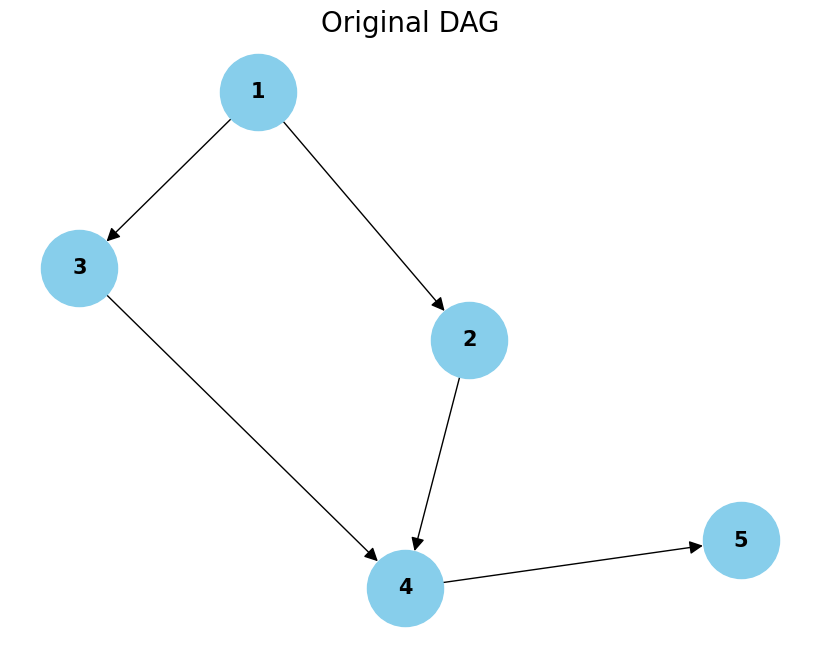

Original Graph:
[(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]
Current inputs to node 3: [1]
Added edge from 2 to 3
Skipping edge between 4 and 3 due to existing edge.
Updated Graph:
[(1, 2), (1, 3), (2, 4), (2, 3), (3, 4), (4, 5)]


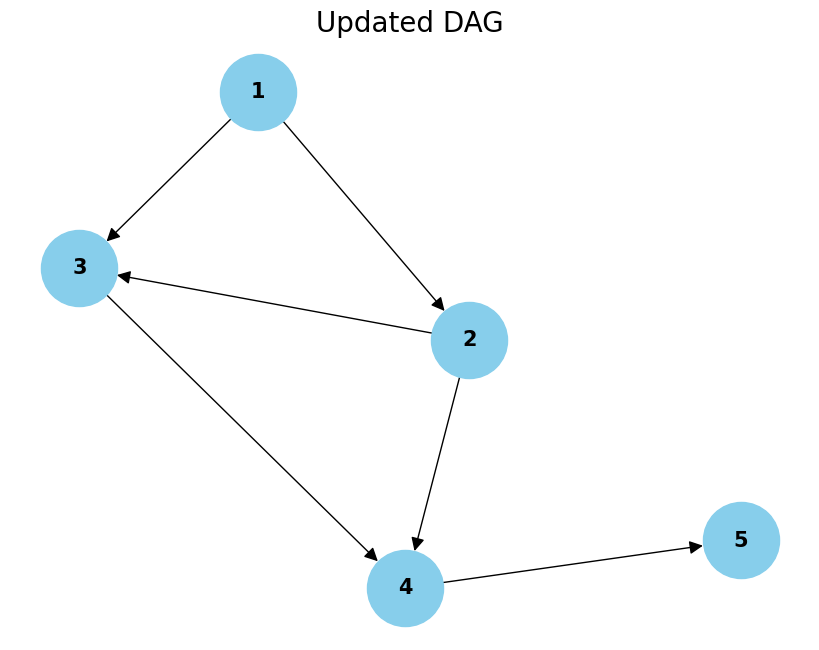

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# 創建一個DAG
G = nx.DiGraph()

# 添加節點
G.add_nodes_from([1, 2, 3, 4, 5])

# 添加有向邊（假設這是已有的DAG）
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# 使用networkx的圖形布局
pos = nx.spring_layout(G)

# 顯示原始DAG
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrowsize=20)
plt.title("Original DAG", fontsize=20)
plt.show()

# 輸出原始邊列表
print("Original Graph:")
print(G.edges())

# 假設我們想要將節點3的輸入邊數量變成 3
target_node = 3
desired_input_count = 3

# 確定當前輸入邊數量
current_inputs = list(G.predecessors(target_node))
print(f"Current inputs to node {target_node}: {current_inputs}")

# 新增輸入邊
if len(current_inputs) < desired_input_count:
    # 找出可以添加邊的節點
    available_nodes = [node for node in G.nodes if node != target_node and node not in current_inputs]
    
    new_inputs = available_nodes[:desired_input_count - len(current_inputs)]
    
    for node in new_inputs:
        # 確保新增邊不會造成循環或雙向邊
        if not G.has_edge(node, target_node) and not G.has_edge(target_node, node):
            G.add_edge(node, target_node)
            print(f"Added edge from {node} to {target_node}")
        else:
            print(f"Skipping edge between {node} and {target_node} due to existing edge.")

# 顯示更新後的DAG
print("Updated Graph:")
print(G.edges())

# 顯示更新後的DAG
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrowsize=20)
plt.title("Updated DAG", fontsize=20)
plt.show()


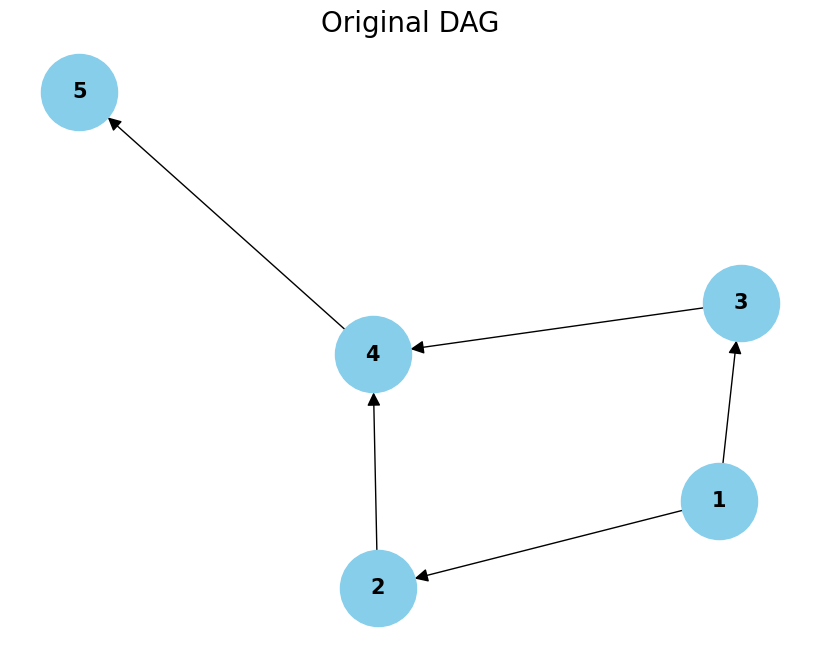

Original Graph:
[(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]
Current inputs to node 3: [1]
Added edge from 2 to 3
Skipping edge between 4 and 3 due to existing edge.
Added edge from 5 to 3
Updated Graph:
[(1, 2), (1, 3), (2, 4), (2, 3), (3, 4), (4, 5), (5, 3)]


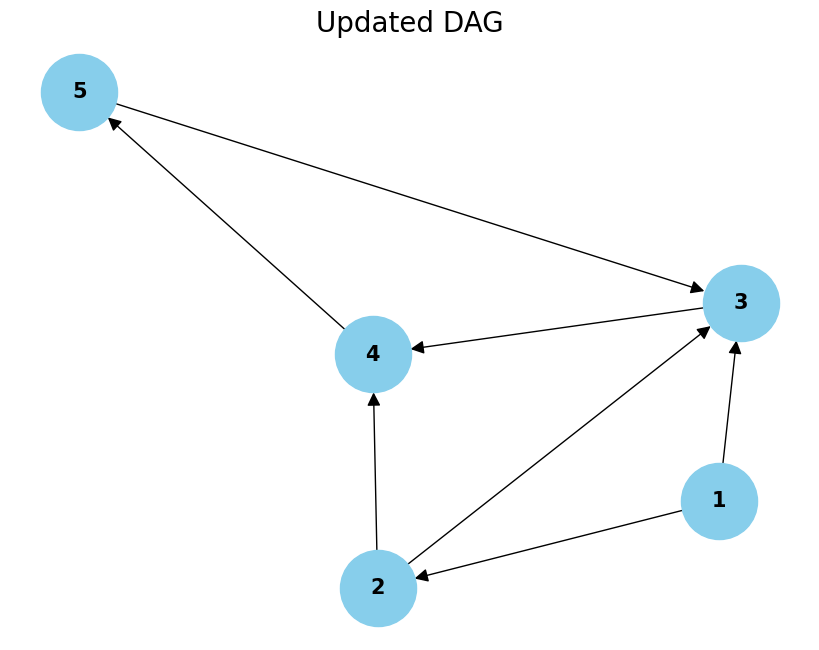

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# 創建一個DAG
G = nx.DiGraph()

# 添加節點
G.add_nodes_from([1, 2, 3, 4, 5])

# 添加有向邊（假設這是已有的DAG）
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)])

# 使用networkx的圖形布局
pos = nx.spring_layout(G)

# 顯示原始DAG
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrowsize=20)
plt.title("Original DAG", fontsize=20)
plt.show()

# 輸出原始邊列表
print("Original Graph:")
print(G.edges())

# 假設我們想要將節點3的輸入邊數量變成 3
target_node = 3
desired_input_count = 3

# 確定當前輸入邊數量
current_inputs = list(G.predecessors(target_node))
print(f"Current inputs to node {target_node}: {current_inputs}")

# 新增輸入邊
if len(current_inputs) < desired_input_count:
    # 找出可以添加邊的節點
    available_nodes = [node for node in G.nodes if node != target_node and node not in current_inputs]
    
    # 嘗試新增邊，直到達到所需的輸入邊數量
    for node in available_nodes:
        if len(current_inputs) >= desired_input_count:
            break
        
        # 確保新增的邊不會造成循環或破壞DAG結構
        if not G.has_edge(node, target_node) and not G.has_edge(target_node, node):
            G.add_edge(node, target_node)
            current_inputs.append(node)
            print(f"Added edge from {node} to {target_node}")
        else:
            print(f"Skipping edge between {node} and {target_node} due to existing edge.")
        
# 顯示更新後的DAG
print("Updated Graph:")
print(G.edges())

# 顯示更新後的DAG
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_weight='bold', arrowsize=20)
plt.title("Updated DAG", fontsize=20)
plt.show()


In [15]:
import networkx as nx
from networkx import ancestors, descendants

import networkx as nx
from networkx import ancestors, descendants

class DAGModifier:
    def __init__(self, edges):
        self.G = nx.DiGraph()
        self.G.add_edges_from(edges)
    
    def modify_node_io(self, node, new_in_degree, new_out_degree):
        # 調整輸入邊
        current_in = self.G.in_degree(node)
        delta_in = new_in_degree - current_in
        if delta_in > 0:
            forbidden = {node} | descendants(self.G, node)
            # 排除已存在的輸入邊的源節點
            existing_src = {u for u, _ in self.G.in_edges(node)}
            candidates = [n for n in self.G.nodes if n not in forbidden and n not in existing_src]
            if len(candidates) < delta_in:
                raise ValueError(f"無法找到足夠的輸入候選節點，需要 {delta_in} 個，但只有 {len(candidates)} 個可用")
            for _ in range(delta_in):
                while candidates:
                    src = candidates.pop(0)
                    if self._add_edge_safely(src, node):
                        break
                else:
                    raise ValueError("無可用候選節點")
        
        elif delta_in < 0:
            in_edges = list(self.G.in_edges(node))
            for _ in range(-delta_in):
                if not in_edges:
                    break
                self.G.remove_edge(in_edges.pop(0)[0], node)
        
        # 調整輸出邊（邏輯類似，需排除已存在的目標節點）
        current_out = self.G.out_degree(node)
        delta_out = new_out_degree - current_out
        if delta_out > 0:
            forbidden = {node} | ancestors(self.G, node)
            # 排除已存在的輸出邊的目標節點
            existing_dst = {v for _, v in self.G.out_edges(node)}
            candidates = [n for n in self.G.nodes if n not in forbidden and n not in existing_dst]
            if len(candidates) < delta_out:
                raise ValueError(f"無法找到足夠的輸出候選節點，需要 {delta_out} 個，但只有 {len(candidates)} 個可用")
            for _ in range(delta_out):
                while candidates:
                    dst = candidates.pop(0)
                    if self._add_edge_safely(node, dst):
                        break
                else:
                    raise ValueError("無可用候選節點")
        # 驗證 DAG 仍然無環
        if not nx.is_directed_acyclic_graph(self.G):
            raise RuntimeError("修改後圖中存在環！")
    
    def _add_edge_safely(self, u, v):
        # 檢查是否會形成環
        if v in ancestors(self.G, u):
            print(f"警告: 無法添加邊 {u}->{v}（會形成環）")
            return False
        self.G.add_edge(u, v)
        return True
    
    def get_edges(self):
        return list(self.G.edges())

# 測試範例
if __name__ == "__main__":
    initial_edges = [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]
    modifier = DAGModifier(initial_edges)
    
    print("原始 DAG 邊:", modifier.get_edges())
    
    # 修改節點 4 的輸入邊從 2 增加到 3，輸出邊從 1 增加到 2
    try:
        # 先新增一個節點 6 以提供輸出候選
        modifier.G.add_node(6)
        modifier.modify_node_io(node=4, new_in_degree=3, new_out_degree=2)
        print("修改後 DAG 邊:", modifier.get_edges())
    except Exception as e:
        print("修改失敗:", e)

原始 DAG 邊: [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5)]
修改後 DAG 邊: [(1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 5), (4, 6)]


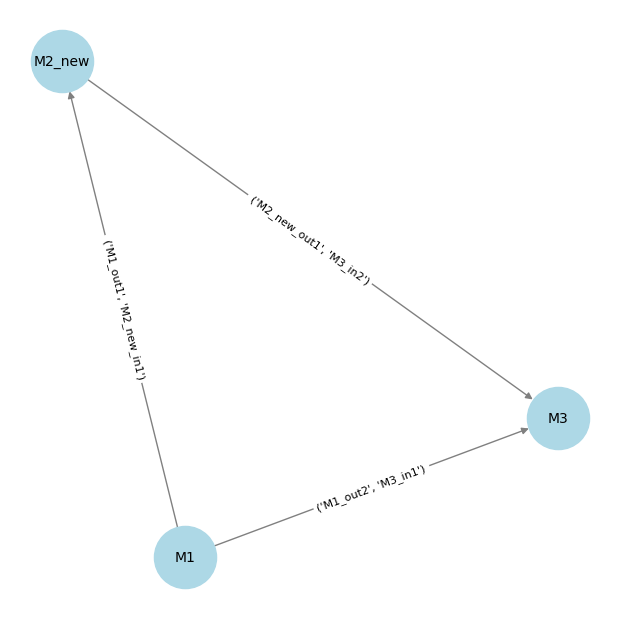

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

class Module:
    def __init__(self, name, inputs, outputs):
        self.name = name
        self.inputs = inputs  # List of input pin names
        self.outputs = outputs  # List of output pin names

# 建立有向圖（DAG）
G = nx.DiGraph()

# 定義模組（module）
modules = {
    "M1": Module("M1", [], ["M1_out1", "M1_out2"]),
    "M2": Module("M2", ["M2_in1"], ["M2_out1"]),
    "M3": Module("M3", ["M3_in1", "M3_in2"], []),
}

# 定義 module 之間的連接（不再獨立存 pin 作為 node）
connections = {
    "M1": [("M1_out1", "M2", "M2_in1"), ("M1_out2", "M3", "M3_in1")],
    "M2": [("M2_out1", "M3", "M3_in2")],
}

# 加入 module 節點
G.add_nodes_from(modules.keys())

# 加入 module 之間的有向邊
for mod, conns in connections.items():
    for out_pin, target_mod, in_pin in conns:
        G.add_edge(mod, target_mod, pin_map=(out_pin, in_pin))

# 替換 Module 函數
def replace_module(old_mod, new_mod, new_inputs, new_outputs):
    if old_mod not in G:
        print(f"Module {old_mod} 不存在！")
        return
    
    # 取得舊 Module 連接資訊
    incoming_edges = [(src, dst, data) for src, dst, data in G.in_edges(old_mod, data=True)]
    outgoing_edges = [(src, dst, data) for src, dst, data in G.out_edges(old_mod, data=True)]
    
    # 刪除舊 Module
    G.remove_node(old_mod)
    
    # 加入新 Module
    G.add_node(new_mod)
    
    # 重新連接輸入（對應新輸入 pin）
    for src, _, data in incoming_edges:
        G.add_edge(src, new_mod, pin_map=(data['pin_map'][0], new_inputs.pop(0)))
    
    # 重新連接輸出（對應新輸出 pin）
    for _, dst, data in outgoing_edges:
        G.add_edge(new_mod, dst, pin_map=(new_outputs.pop(0), data['pin_map'][1]))

# 測試替換 M2 -> M2_new
replace_module("M2", "M2_new", ["M2_new_in1", "M2_new_in2"], ["M2_new_out1"])

# 繪製 DAG
def draw_graph():
    plt.figure(figsize=(6, 6))
    pos = nx.spring_layout(G)
    edge_labels = {(u, v): d['pin_map'] for u, v, d in G.edges(data=True)}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
    plt.show()

draw_graph()


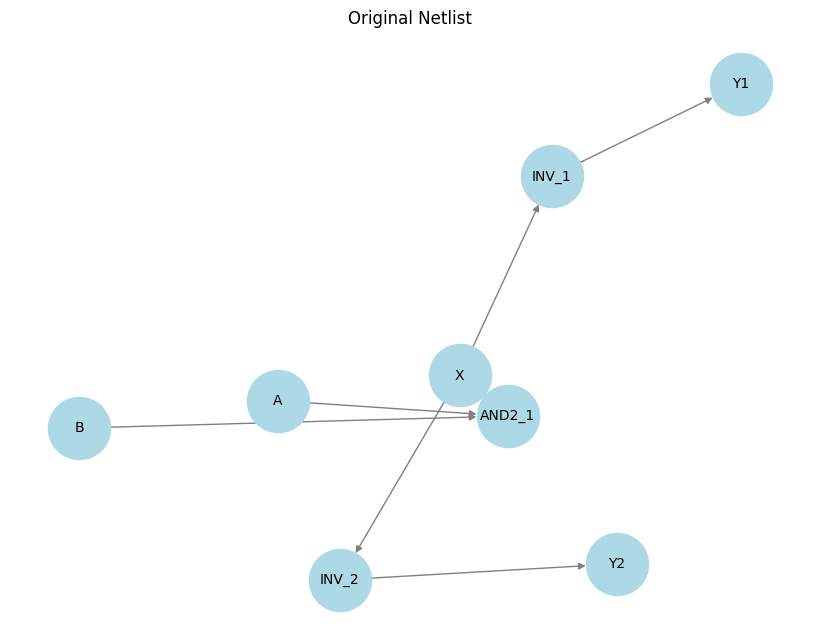

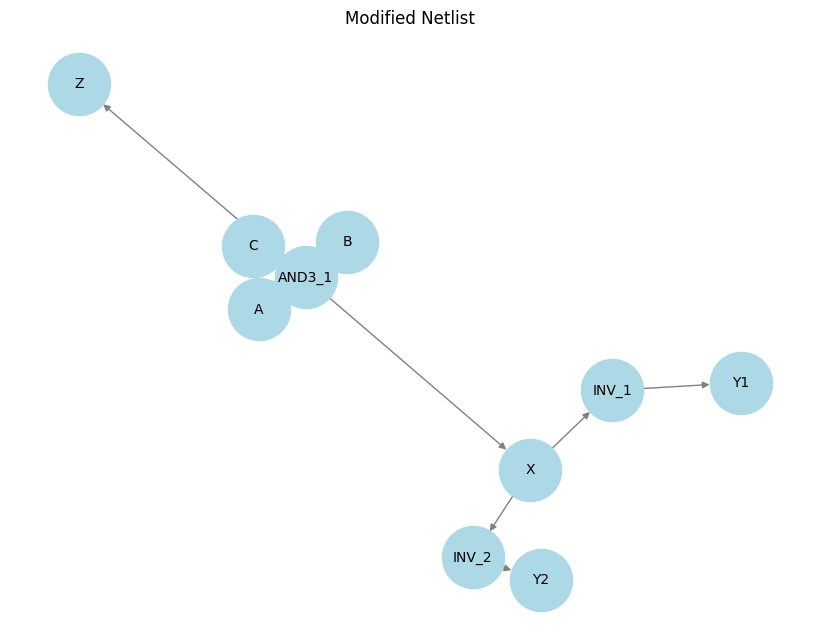

Fanout of Y1: {}
Fanout of X: {'INV_1': 1, 'INV_2': 1}
[('INV_1', 'Y1'), ('INV_2', 'Y2'), ('A', 'AND3_1'), ('B', 'AND3_1'), ('X', 'INV_1'), ('X', 'INV_2'), ('AND3_1', 'X'), ('AND3_1', 'Z'), ('C', 'AND3_1')]


In [29]:
import networkx as nx
import matplotlib.pyplot as plt

def build_netlist():
    """建立簡單的 netlist graph."""
    G = nx.DiGraph()
    
    # 加入 cells (instances)
    G.add_node("AND2_1", type="AND2", inputs=["A", "B"], outputs=["X"])
    G.add_node("INV_1", type="INV", inputs=["X"], outputs=["Y1"])
    G.add_node("INV_2", type="INV", inputs=["X"], outputs=["Y2"])
    
    # 加入 net (wires)
    G.add_edges_from([("A", "AND2_1"), ("B", "AND2_1"),
                      ("AND2_1", "X"), ("X", "INV_1"), ("INV_1", "Y1"),
                      ("INV_2", "Y2"), ("X", "INV_2")])
    
    return G

def replace_cell(G, old_cell, new_cell, extra_inputs, extra_outputs):
    """替換 old_cell 為 new_cell，確保連接符合有向圖規則。"""
    if old_cell not in G:
        print(f"Cell {old_cell} 不存在!")
        return
    
    # 取得舊 cell 連接資訊
    old_inputs = G.nodes[old_cell]["inputs"]
    old_outputs = G.nodes[old_cell]["outputs"]
    
    # 刪除舊 cell
    G.remove_node(old_cell)
    
    # 新增新 cell
    G.add_node(new_cell, type="AND3", inputs=old_inputs + extra_inputs, outputs=old_outputs + extra_outputs)
    
    # 重新建立連接
    for inp in old_inputs + extra_inputs:
        G.add_edge(inp, new_cell)
    for outp in old_outputs + extra_outputs:
        G.add_edge(new_cell, outp)
    
    return G

def calculate_fanout(G, node):
    """計算每個 output pin 推動的 input pin 數量."""
    if node not in G:
        print(f"Node {node} 不存在!")
        return {}
    
    fanout_dict = {}
    for _, successor in G.out_edges(node):
        if successor in G.nodes:
            fanout_dict[successor] = fanout_dict.get(successor, 0) + 1
    
    return fanout_dict

def visualize_netlist(G, title):
    """繪製 netlist 圖"""
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title(title)
    plt.show()

# 測試流程
G = build_netlist()
visualize_netlist(G, "Original Netlist")

replace_cell(G, "AND2_1", "AND3_1", ["C"], ["Z"])  # 替換 AND2 -> AND3
visualize_netlist(G, "Modified Netlist")

print("Fanout of Y1:", calculate_fanout(G, "Y1"))
print("Fanout of X:", calculate_fanout(G, "X"))
print(list(G.edges))


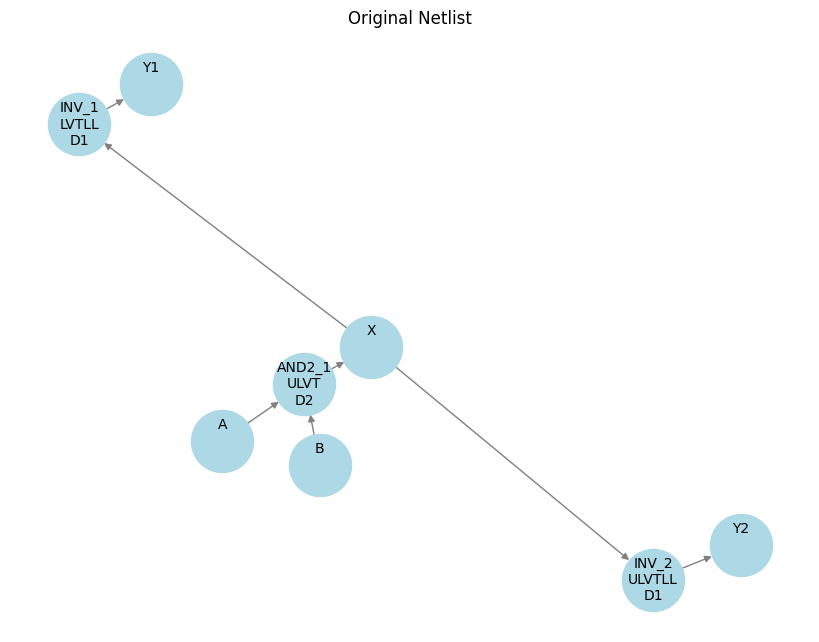

gen	nevals
0  	10    
1  	6     
2  	7     
3  	7     
4  	9     
5  	3     
6  	2     
7  	7     
8  	5     
9  	9     
10 	8     
11 	6     
12 	2     
13 	4     
14 	4     
15 	4     
16 	2     
17 	8     
18 	9     
19 	5     
20 	5     


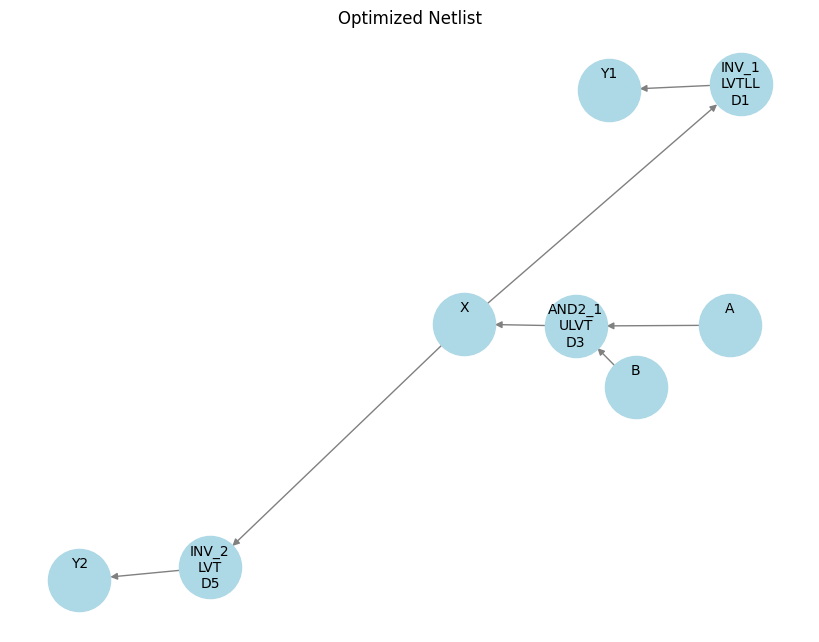

In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from deap import base, creator, tools, algorithms

# 定義 cell library
CELL_LIBRARY = {
    "AND2": {"vt": ["ULVT", "LVT", "ULVTLL", "LVTLL"], "driving": ["D1", "D2", "D3", "D4", "D5"], "pin_count": 3},
    "AND3": {"vt": ["ULVT", "LVT"], "driving": ["D1", "D2", "D3"], "pin_count": 4},
    "INV": {"vt": ["ULVT", "LVT", "ULVTLL", "LVTLL"], "driving": ["D1", "D2"], "pin_count": 2},
    "MB8": {"vt": ["ULVT"], "driving": ["D5"], "pin_count": 8},
    "SDFQ": {"vt": ["ULVT", "LVT"], "driving": ["D3", "D4"], "pin_count": 3}
}

# 建立 netlist
def build_netlist():
    G = nx.DiGraph()
    G.add_node("AND2_1", type="AND2", inputs=["A", "B"], outputs=["X"])
    G.add_node("INV_1", type="INV", inputs=["X"], outputs=["Y1"])
    G.add_node("INV_2", type="INV", inputs=["X"], outputs=["Y2"])
    
    # 加入 pin 節點
    G.add_node("A", type="pin")
    G.add_node("B", type="pin")
    G.add_node("X", type="pin")
    G.add_node("Y1", type="pin")
    G.add_node("Y2", type="pin")
    
    G.add_edges_from([( "A", "AND2_1"), ("B", "AND2_1"),
                      ("AND2_1", "X"), ("X", "INV_1"), ("INV_1", "Y1"),
                      ("X", "INV_2"), ("INV_2", "Y2")])
    return G

# 初始化 cell 屬性
def assign_attributes(G):
    for node in G.nodes:
        if "type" in G.nodes[node] and G.nodes[node]["type"] in CELL_LIBRARY:
            cell_type = G.nodes[node]["type"]
            G.nodes[node]["vt"] = random.choice(CELL_LIBRARY[cell_type]["vt"])
            G.nodes[node]["driving"] = random.choice(CELL_LIBRARY[cell_type]["driving"])
    return G

# 計算適應度
def fitness_function(individual):
    vt_distribution = {"ULVT": 0.25, "LVT": 0.25, "ULVTLL": 0.25, "LVTLL": 0.25}
    vt_counts = {vt: 0 for vt in vt_distribution}
    driving_counts = {"D1": 0, "D2": 0, "D3": 0, "D4": 0, "D5": 0}
    logic_penalty, pin_penalty, fanout_penalty = 0, 0, 0
    
    for vt, driving, pin_count, fanout in individual:
        vt_counts[vt] += 1
        driving_counts[driving] += 1
        if pin_count > 3:
            pin_penalty += 1
        if fanout < 1:
            fanout_penalty += 1
        if vt_counts[vt] / sum(vt_counts.values()) > vt_distribution[vt]:
            logic_penalty += 1

    vt_score = -sum(abs((vt_counts[vt] / sum(vt_counts.values())) - vt_distribution[vt]) for vt in vt_distribution)
    driving_score = sum(driving_counts.values())
    
    return (vt_score + driving_score - (logic_penalty + pin_penalty + fanout_penalty),)

# 基因演算法
def optimize_netlist(G):
    nodes = [node for node in G.nodes if "type" in G.nodes[node] and G.nodes[node]["type"] in CELL_LIBRARY]
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_vt", lambda: random.choice(["ULVT", "LVT", "ULVTLL", "LVTLL"]))
    toolbox.register("attr_driving", lambda: random.choice(["D1", "D2", "D3", "D4", "D5"]))
    toolbox.register("attr_pin_count", lambda: random.randint(2, 3))
    toolbox.register("attr_fanout", lambda: random.randint(1, 3))
    toolbox.register("individual", tools.initRepeat, creator.Individual, 
                     lambda: (toolbox.attr_vt(), toolbox.attr_driving(), toolbox.attr_pin_count(), toolbox.attr_fanout()), n=len(nodes))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", fitness_function)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=10)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=20, verbose=True)
    
    best_individual = tools.selBest(population, k=1)[0]
    for i, node in enumerate(nodes):
        G.nodes[node]["vt"], G.nodes[node]["driving"], G.nodes[node]["pin_count"], G.nodes[node]["fanout"] = best_individual[i]
    
    return G

# 視覺化 netlist
def visualize_netlist(G, title):
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    labels = {node: f"{node}\n{G.nodes[node].get('vt', '')}\n{G.nodes[node].get('driving', '')}" for node in G.nodes}
    nx.draw(G, pos, with_labels=True, labels=labels, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
    plt.title(title)
    plt.show()

# 執行流程
G = build_netlist()
G = assign_attributes(G)
visualize_netlist(G, "Original Netlist")
G_optimized = optimize_netlist(G)
visualize_netlist(G_optimized, "Optimized Netlist")


In [31]:
pip install deap

Note: you may need to restart the kernel to use updated packages.
